In [40]:
from pathlib import Path

import scanpy as sc
import pandas as pd
import numpy as np
import partipy as pt
import decoupler as dc
import plotnine as pn

from data_utils import load_hepatocyte_data_2

In [ ]:
adata = load_hepatocyte_data_2()
adata

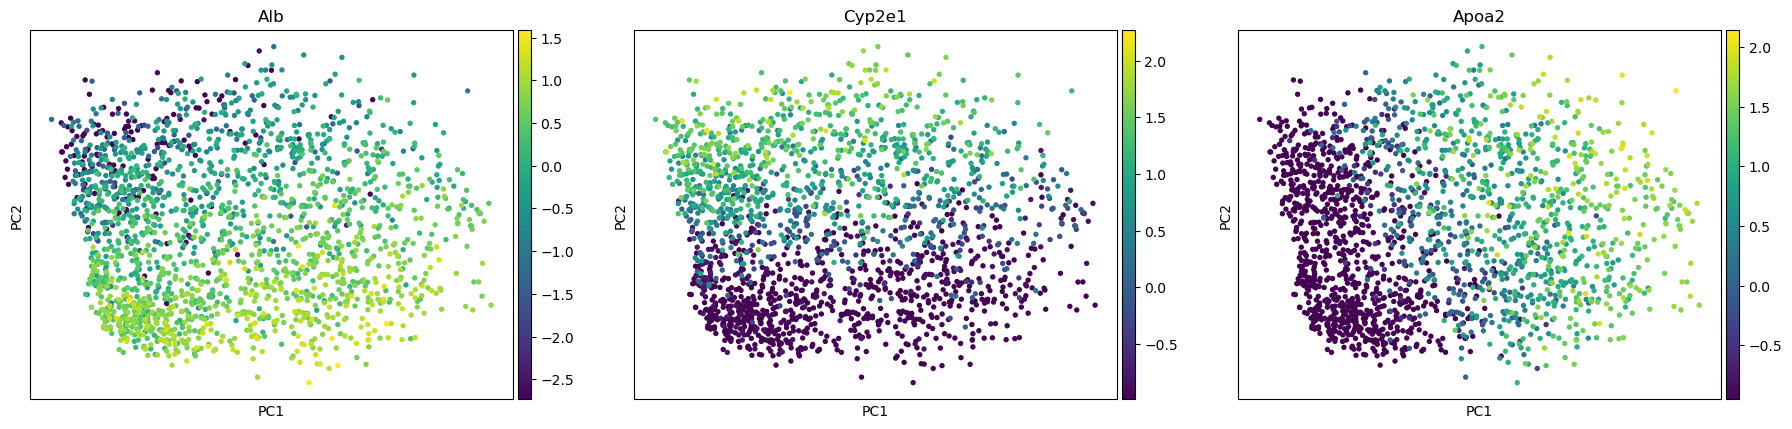

In [11]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata, mask_var="highly_variable")
adata.layers["z_scaled"]= sc.pp.scale(adata.X, max_value=10)
sc.pl.pca_scatter(adata, color=["Alb", "Cyp2e1", "Apoa2"])

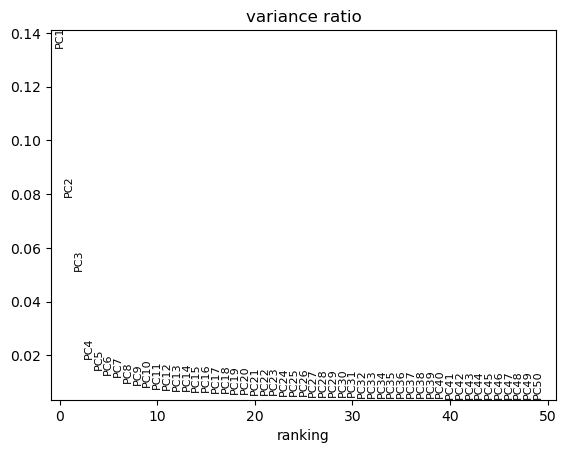

In [12]:
sc.pl.pca_variance_ratio(adata, n_pcs=50)

In [15]:
pt.set_obsm(adata=adata, obsm_key="X_pca", n_dimension=7)

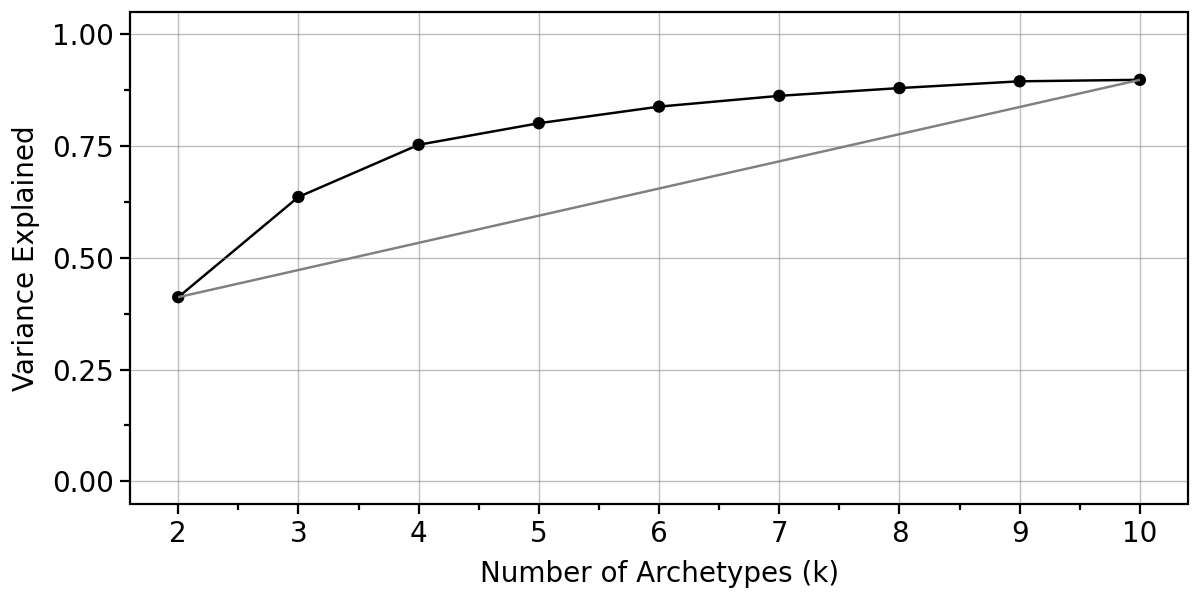

In [ ]:
pt.compute_selection_metrics(adata=adata, min_k=2, max_k=10)
pt.plot_var_explained(adata)

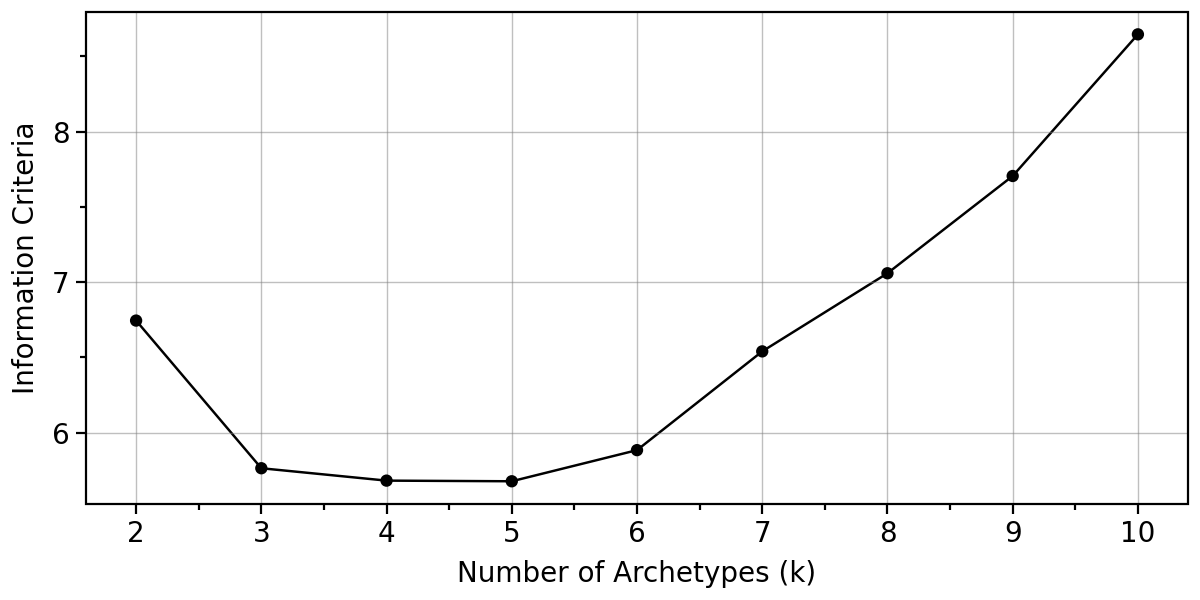

In [17]:
pt.plot_IC(adata)

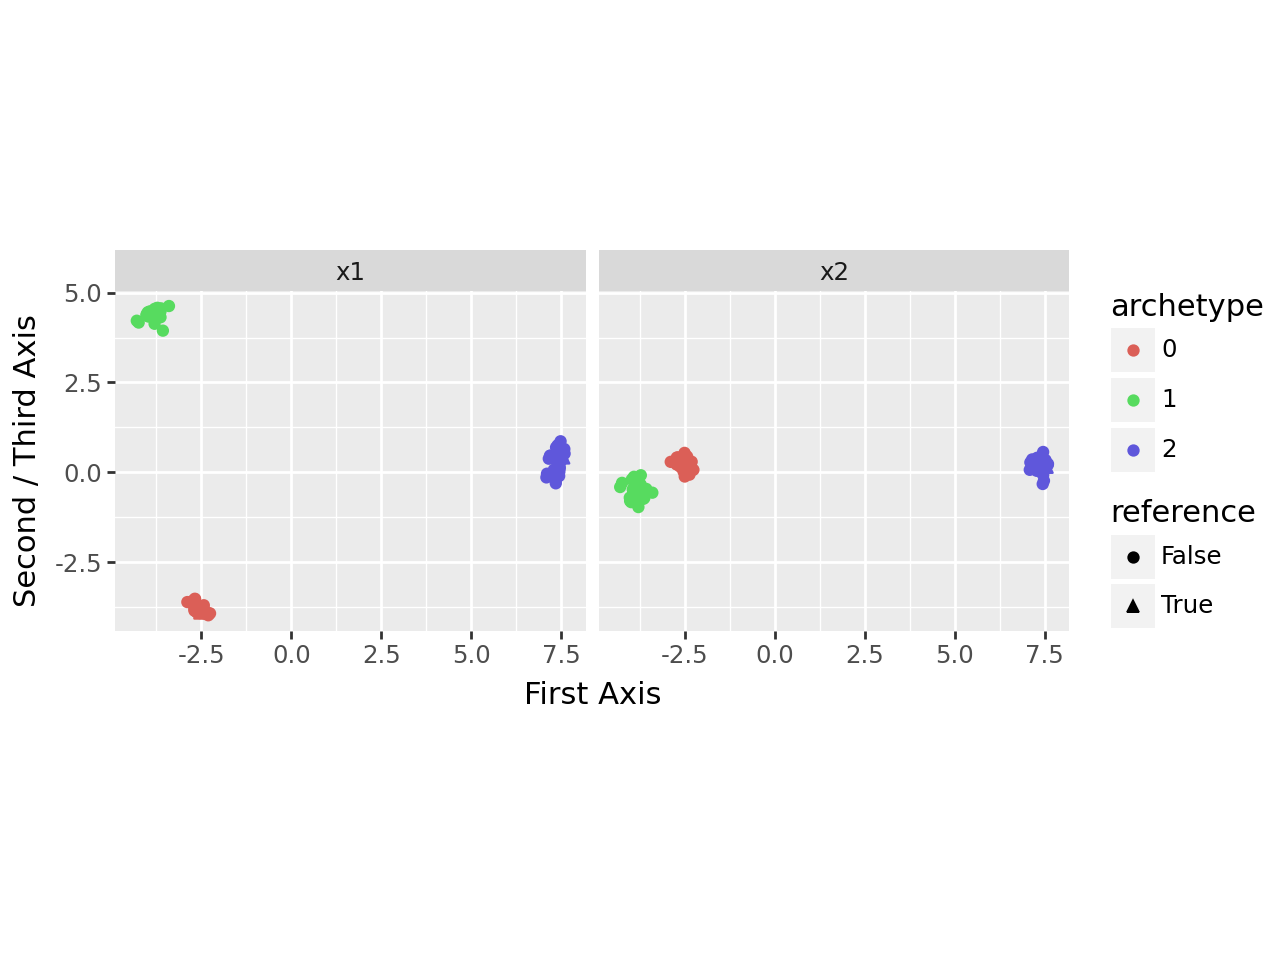

In [18]:
pt.compute_bootstrap_variance(adata=adata, n_bootstrap=30, n_archetypes_list=range(2, 8))
#pt.plot_bootstrap_3D(adata)
pt.plot_bootstrap_2D(adata, n_archetypes=3)

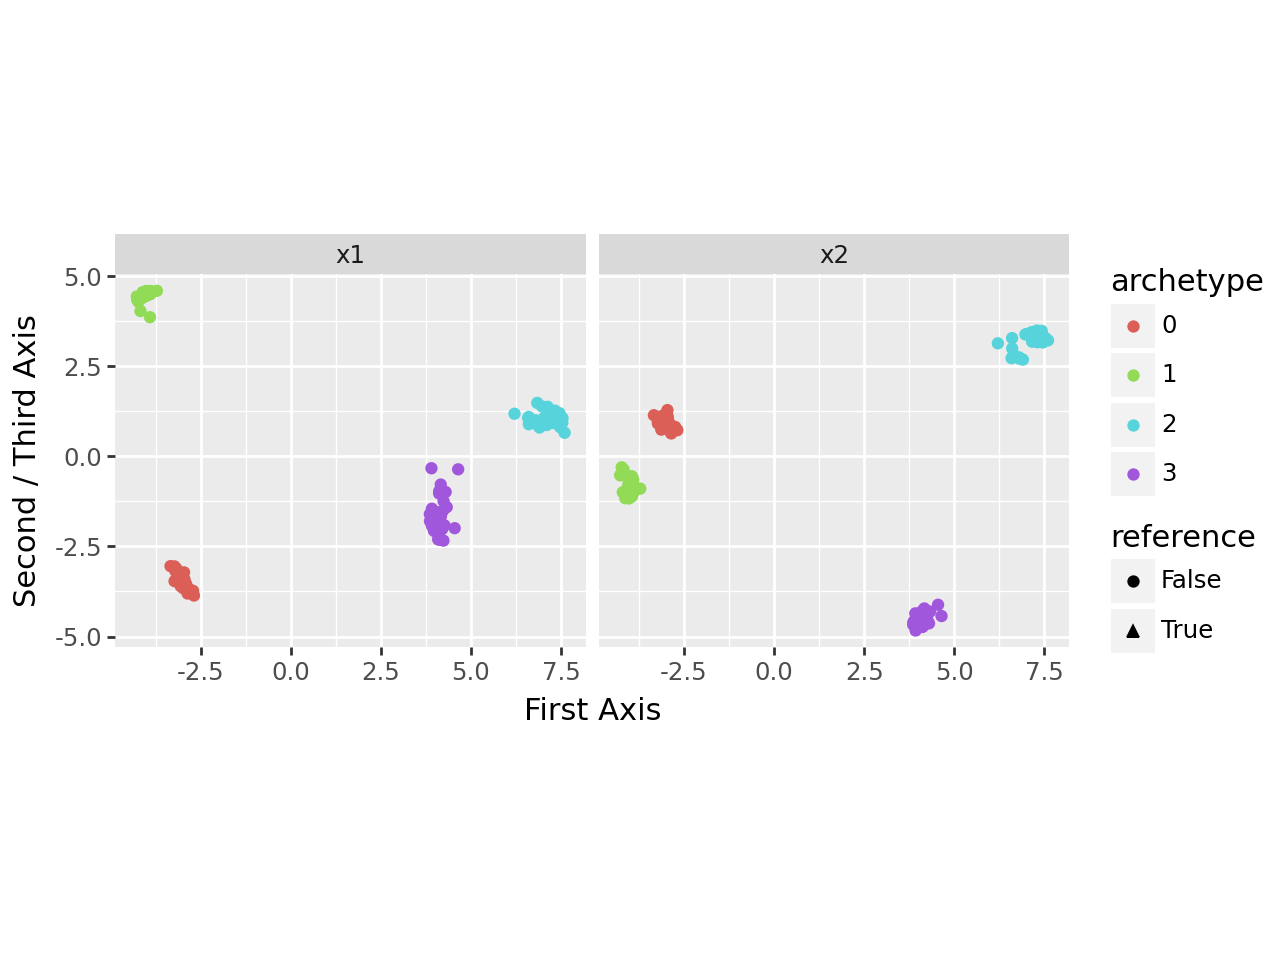

In [19]:
pt.plot_bootstrap_2D(adata, n_archetypes=4)

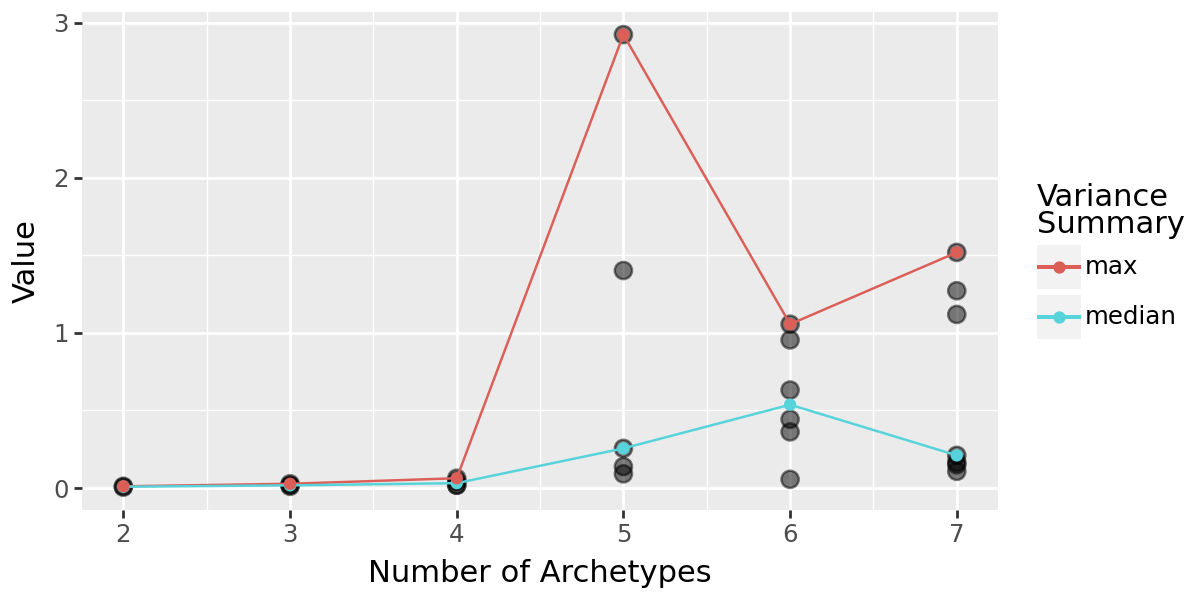

In [255]:
pt.plot_bootstrap_variance(adata) + pn.theme(figure_size=(6, 3))

iter: 49 | RSS: 3457.335 | rel_delta_RSS: -0.000069
Algorithm converged after 49 iterations.


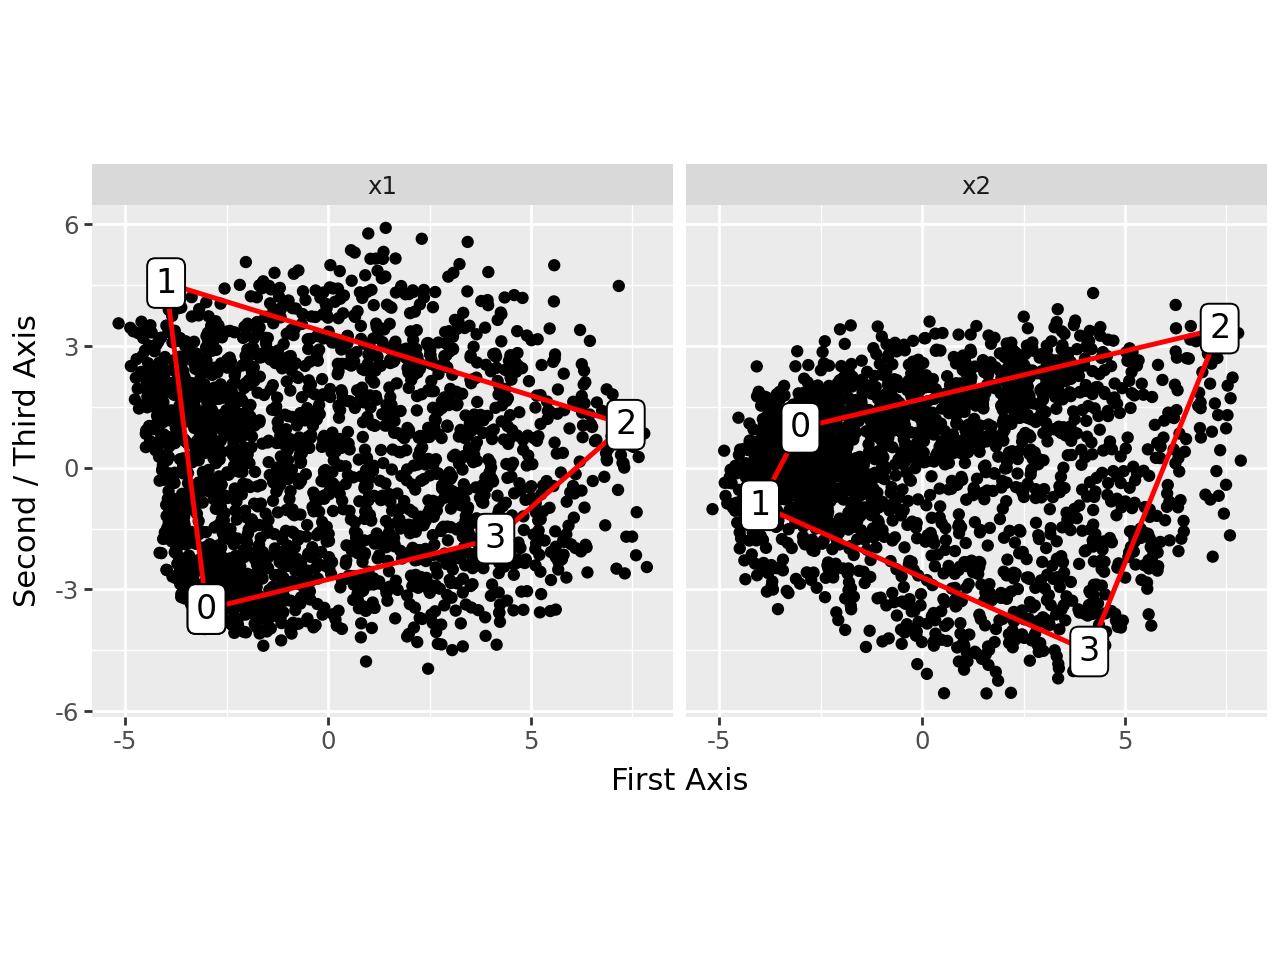

In [21]:
pt.compute_archetypes(adata, n_archetypes=4, verbose=True, archetypes_only=False)

pt.plot_archetypes_2D(adata=adata)

Applied length scale is 3.144078478629057.


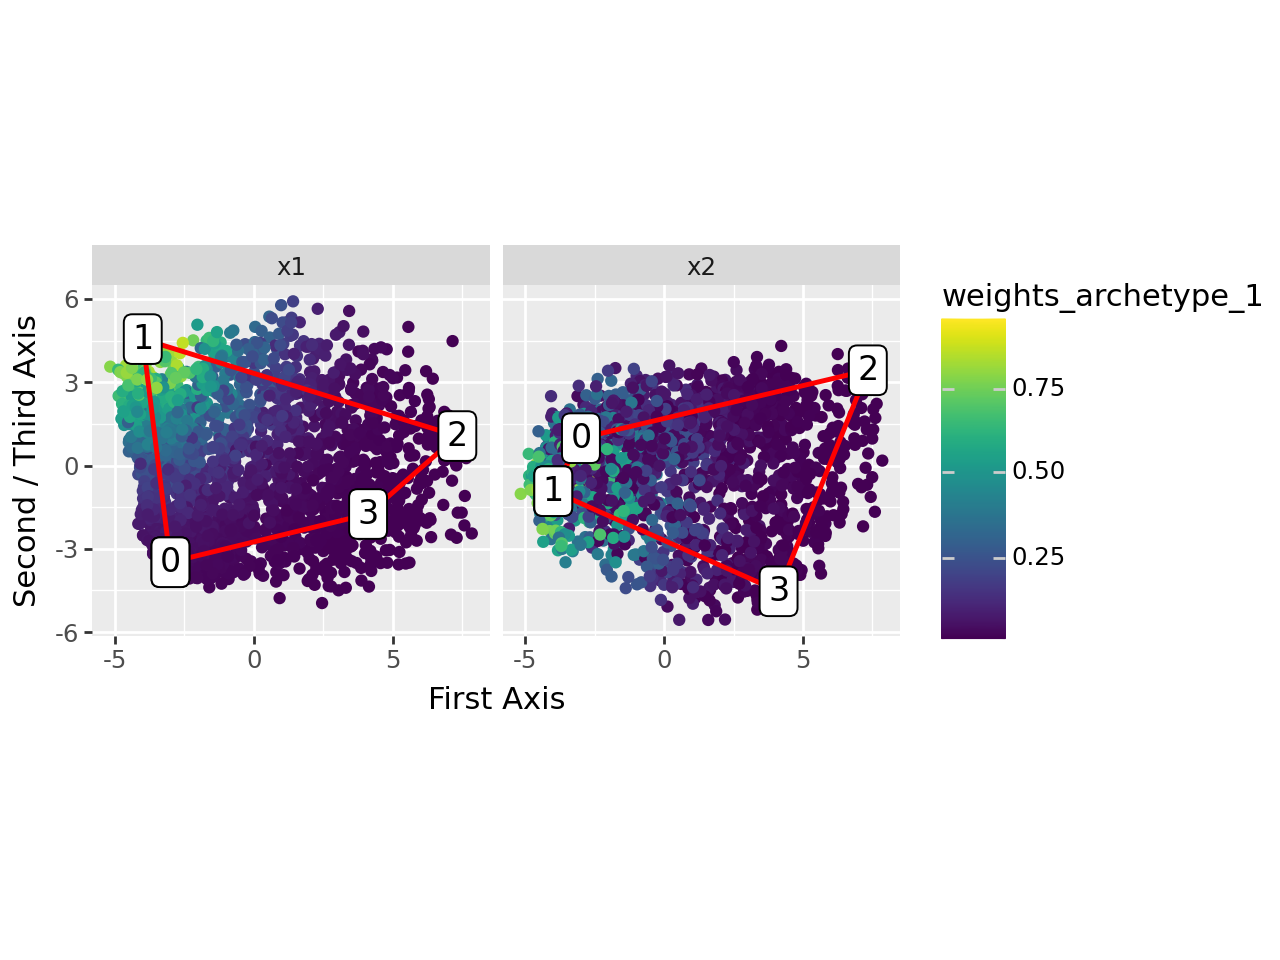

In [ ]:
arch_idx = 1

pt.compute_archetype_weights(adata=adata, mode="automatic")
archetype_expression = pt.compute_archetype_expression(adata=adata, layer="z_scaled")

adata.obs[f"weights_archetype_{arch_idx}"] = adata.obsm["cell_weights"][:, arch_idx]
pt.plot_archetypes_2D(adata=adata, color=f"weights_archetype_{arch_idx}")

In [66]:
archetype_expression.T.sort_values(0, ascending=False).head(20)

,0,1,2,3
Pigr,0.427259,-0.438388,-0.036484,-0.116675
Hal,0.416409,-0.422602,-0.077710,-0.029968
Pck1,0.407433,-0.215694,-0.209673,-0.304751
Cyp2f2,0.401996,-0.559167,0.000426,0.181360
Trf,0.366421,-0.251762,-0.123119,-0.125165
Uox,0.353341,-0.149082,-0.152271,-0.316630
Gls2,0.339164,-0.348342,-0.036071,-0.059846
Serpina1e,0.336818,-0.520981,0.480449,-0.312622
Cps1,0.333707,-0.235935,-0.355089,0.037575
Sfxn1,0.302766,-0.264273,-0.039254,-0.113071


In [206]:
archetype_expression.T.sort_values(3, ascending=False).head(20)

,0,1,2,3
Apoa1,-0.446007,-0.646273,0.993034,0.931033
Ambp,-0.218938,-0.440602,0.277368,0.876649
Apoa2,-0.712313,-0.492375,1.007364,0.855560
Ttr,-0.567515,-0.636843,1.215179,0.848930
Vtn,-0.219574,-0.450192,0.276901,0.847168
mt-Co3,0.005657,-0.223056,-0.352636,0.813757
Kng1,-0.203398,-0.343663,0.209040,0.766787
Apoe,-0.531175,-0.451685,0.665421,0.765337
Fgb,-0.104190,-0.646850,0.442956,0.744060
Apoh,-0.288664,-0.346695,0.331514,0.740519


In [60]:
archetype_expression.T.sort_values(1, ascending=False).head(15).index

Index(['Cyp2e1', 'Oat', 'Cyp2c29', 'Rgn', 'Cyp2c50', 'Cyp3a11', 'Cyp4a10',
       'Csad', 'Acaa1b', 'Slco1b2', 'Cyp1a2', 'Rpl41', 'Rpl37a', 'Car3',
       'Aldh3a2'],
      dtype='object')

In [62]:
archetype_expression.T.sort_values(2, ascending=False).head(15).index

Index(['Fabp1', 'Apoc3', 'Ttr', 'Dbi', 'Apoa2', 'Apoa1', 'Apoc1', 'Gstp1',
       'Chchd10', 'Ndufa4', 'Ddt', 'Ppia', 'Cox7b', 'Mup3', 'Apoc4'],
      dtype='object')

In [63]:
archetype_expression.T.sort_values(3, ascending=False).head(15)

,0,1,2,3
Apoa1,-0.446007,-0.646273,0.993034,0.931033
Ambp,-0.218938,-0.440602,0.277368,0.876649
Apoa2,-0.712313,-0.492375,1.007364,0.855560
Ttr,-0.567515,-0.636843,1.215179,0.848930
Vtn,-0.219574,-0.450192,0.276901,0.847168
mt-Co3,0.005657,-0.223056,-0.352636,0.813757
Kng1,-0.203398,-0.343663,0.209040,0.766787
Apoe,-0.531175,-0.451685,0.665421,0.765337
Fgb,-0.104190,-0.646850,0.442956,0.744060
Apoh,-0.288664,-0.346695,0.331514,0.740519


In [68]:
msigdb_raw["collection"].unique()

array(['immunesigdb', 'tf_targets_legacy', 'positional',
       'cell_type_signatures', 'go_cellular_component',
       'chemical_and_genetic_perturbations', 'mirna_targets_mirdb',
       'vaccine_response', 'cancer_modules', 'reactome_pathways',
       'tf_targets_gtrf', 'go_biological_process',
       'go_molecular_function', 'oncogenic_signatures', 'hallmark',
       'kegg_pathways', 'pid_pathways', 'human_phenotype_ontology',
       'wikipathways', 'cancer_gene_neighborhoods',
       'mirna_targets_legacy', 'biocarta_pathways'], dtype=object)

In [140]:
dc.op.show_resources()

,name,license
0,Adhesome,commercial
1,Almen2009,commercial
2,Baccin2019,academic
3,CORUM_Funcat,academic
4,CORUM_GO,academic
...,...,...
76,iTALK,academic
77,kinase.com,non_profit
78,scConnect,commercial
79,scConnect_complex,commercial


In [207]:
database = "reactome_pathways"
min_genes_per_pathway = 5
max_genes_per_pathway = 80

# dc.op.resource("SIGNOR", organism="mouse")
msigdb_raw = dc.op.resource("MSigDB")
msigdb = msigdb_raw[msigdb_raw["collection"]==database]
selection_vec = ~ np.array(["RESPONSE_TO" in s for s in msigdb["geneset"]]) & \
    ~ np.array(["GENE_EXPRESSION" in s for s in msigdb["geneset"]]) & \
    ~ np.array(["SARS_COV" in s for s in msigdb["geneset"]]) & \
    ~ np.array(["STIMULATED_TRANSCRIPTION" in s for s in msigdb["geneset"]])
msigdb = msigdb.loc[selection_vec, :].copy()
msigdb = msigdb[~msigdb.duplicated(["geneset", "genesymbol"])].copy()
genesets_within_min = (msigdb.value_counts("geneset") >= min_genes_per_pathway).reset_index().query("count")["geneset"].to_list()
genesets_within_max = (msigdb.value_counts("geneset") <= max_genes_per_pathway).reset_index().query("count")["geneset"].to_list()
genesets_to_keep = list(set(genesets_within_min) & set(genesets_within_max))
msigdb = msigdb.loc[msigdb["geneset"].isin(genesets_to_keep), :].copy() # removing small gene sets
msigdb_mouse = dc.op.translate(msigdb, target_organism="mouse") # requires decoupler >= 2.0.0
msigdb_mouse = msigdb_mouse.drop_duplicates()
msigdb_mouse = msigdb_mouse.rename(columns={"geneset": "source", "genesymbol": "target"})

acts_ulm_est, acts_ulm_est_p = dc.mt.ulm(data=archetype_expression,
                                         net=msigdb_mouse,
                                         verbose=True)

acts_ulm_est.iloc[:4, :4]

2025-05-27 21:34:53 | [INFO] ulm - Running ulm
2025-05-27 21:34:53 | [INFO] Extracted omics mat with 4 rows (observations) and 11706 columns (features)
2025-05-27 21:34:53 | [WARNING] weight not found in net.columns, adding it as:
net['weight'] = 1
2025-05-27 21:34:53 | [INFO] Network adjacency matrix has 3991 unique features and 884 unique sources
2025-05-27 21:34:53 | [INFO] ulm - fitting 884 univariate models of 11706 observations (targets) with 11704 degrees of freedom
2025-05-27 21:34:53 | [INFO] ulm - adjusting p-values by FDR
2025-05-27 21:34:53 | [INFO] ulm - done


,REACTOME_2_LTR_CIRCLE_FORMATION,REACTOME_ABACAVIR_ADME,REACTOME_ABC_TRANSPORTERS_IN_LIPID_HOMEOSTASIS,REACTOME_ABERRANT_REGULATION_OF_MITOTIC_EXIT_IN_CANCER_DUE_TO_RB1_DEFECTS
0,-0.449652,0.164896,-1.726608,-0.054783
1,0.483743,0.398270,-1.281563,0.176210
2,-0.298586,-1.318460,1.375847,0.596268
3,0.568431,-0.688264,3.168260,-0.019323


In [200]:
top_processes = pt.extract_enriched_processes(est=acts_ulm_est,
                                              pval=acts_ulm_est_p,
                                              order="desc",
                                              n=15,
                                              p_threshold=0.05)

{0:                                               Process  ...  specificity
 0                       REACTOME_HISTIDINE_CATABOLISM  ...     9.312068
 1                            REACTOME_SYNTHESIS_OF_PE  ...     7.076533
 2              REACTOME_CARGO_CONCENTRATION_IN_THE_ER  ...     3.018389
 3                                 REACTOME_UREA_CYCLE  ...     3.049734
 4                              REACTOME_LDL_CLEARANCE  ...     3.475838
 5   REACTOME_FOXO_MEDIATED_TRANSCRIPTION_OF_OXIDAT...  ...     2.535332
 6   REACTOME_AMINO_ACID_TRANSPORT_ACROSS_THE_PLASM...  ...     2.914911
 7        REACTOME_ASPARTATE_AND_ASPARAGINE_METABOLISM  ...     4.008075
 8   REACTOME_METABOLISM_OF_INGESTED_SEMET_SEC_MESE...  ...     3.282106
 9                REACTOME_FATTY_ACYL_COA_BIOSYNTHESIS  ...     0.629944
 10                   REACTOME_INTERLEUKIN_6_SIGNALING  ...     3.082750
 11                       REACTOME_HS_GAG_BIOSYNTHESIS  ...     3.626524
 12            REACTOME_INTERLEUKIN_6_FAMILY_SIG

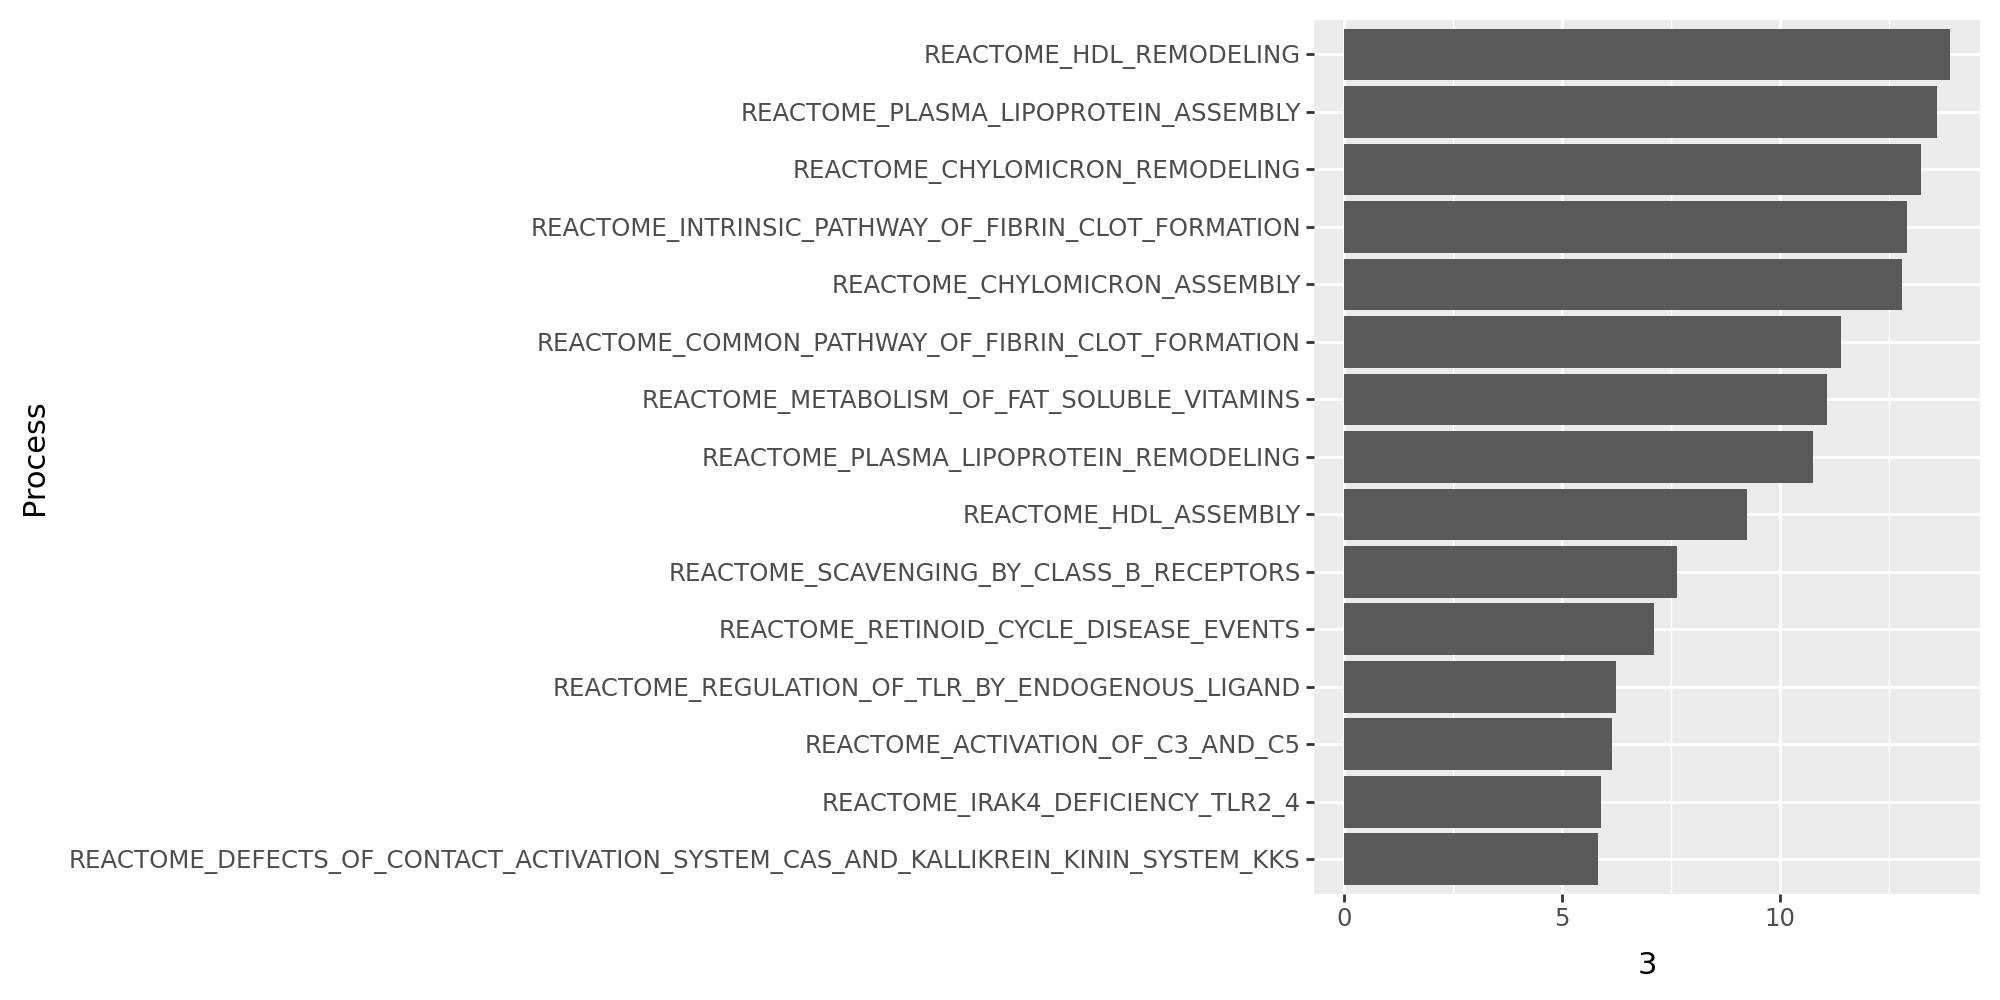

In [248]:
arch_idx = 3

top_processes[arch_idx]["Process"] = pd.Categorical(
    top_processes[arch_idx]["Process"],
    categories=top_processes[arch_idx].sort_values(f"{arch_idx}", ascending=True)["Process"].to_list()
)

(pn.ggplot(top_processes[arch_idx])
 + pn.geom_col(pn.aes(x="Process", y=f"{arch_idx}"))
 + pn.coord_flip()
 + pn.theme(figure_size=(10, 5)))


REACTOME_INTRINSIC_PATHWAY_OF_FIBRIN_CLOT_FORMATION


array(['Kng1', 'Serpinc1', 'Mug1', 'F2', 'F10', 'Serping1', 'Mug2', 'F12',
       'Kng2', 'Proc'], dtype='<U14')

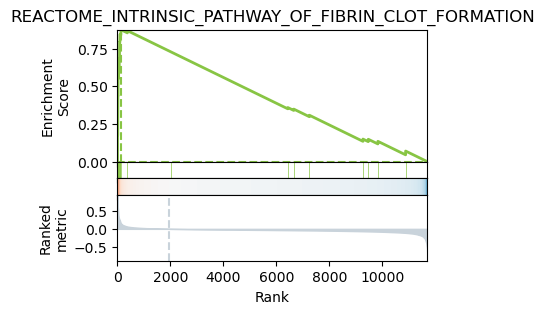

In [253]:
df = archetype_expression.T.copy()
df.columns = ["arch_" + str(c) for c in df.columns]
process = top_processes[arch_idx]["Process"][3]
print(process)
_, le = dc.pl.leading_edge(
    df = df,
    net = msigdb_mouse,
    stat = f"arch_{arch_idx}",
    name = process
)
le

In [252]:
archetype_expression.T.sort_values(arch_idx, ascending=False).head(20)

,0,1,2,3
Apoa1,-0.446007,-0.646273,0.993034,0.931033
Ambp,-0.218938,-0.440602,0.277368,0.876649
Apoa2,-0.712313,-0.492375,1.007364,0.855560
Ttr,-0.567515,-0.636843,1.215179,0.848930
Vtn,-0.219574,-0.450192,0.276901,0.847168
mt-Co3,0.005657,-0.223056,-0.352636,0.813757
Kng1,-0.203398,-0.343663,0.209040,0.766787
Apoe,-0.531175,-0.451685,0.665421,0.765337
Fgb,-0.104190,-0.646850,0.442956,0.744060
Apoh,-0.288664,-0.346695,0.331514,0.740519


In [210]:
df = archetype_expression.T.copy()
df.columns = ["arch_" + str(c) for c in df.columns]
df

,arch_0,arch_1,arch_2,arch_3
Mrpl15,-0.066439,-0.006510,0.190365,0.013341
Lypla1,0.018579,0.057015,-0.085882,-0.095568
Tcea1,-0.008412,0.083924,-0.060337,-0.140897
Atp6v1h,-0.019018,0.034841,-0.031223,-0.075132
Rb1cc1,0.046817,-0.020311,-0.010497,-0.005497
...,...,...,...,...
Aldh18a1,-0.012432,-0.021290,-0.022007,-0.021062
Tctn3,-0.013522,-0.012057,-0.022219,-0.021590
Kazald1,-0.016803,-0.009047,-0.022277,-0.022215
Hps6,-0.020348,-0.017033,-0.021846,-0.022248


In [ ]:
_, le = dc.pl.leading_edge(
    df = df,
    net = msigdb_mouse,
    stat = "arch_1",
    name = "REACTOME_BIOSYNTHESIS_OF_MARESINS"
)
le

array(['Cyp2e1', 'Cyp2c29', 'Cyp2c50', 'Cyp1a2', 'Cyp2c37', 'Cyp2c38',
       'Ephx2'], dtype='<U14')

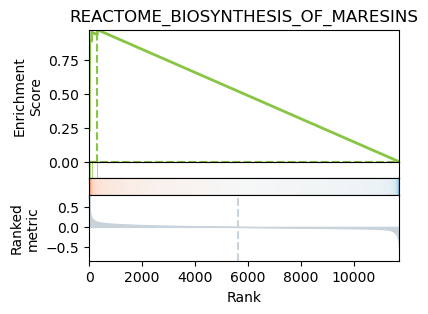

In [218]:
_, le = dc.pl.leading_edge(
    df = df,
    net = msigdb_mouse,
    stat = "arch_1",
    name = "REACTOME_BIOSYNTHESIS_OF_MARESINS"
)
le

array(['Cyp2e1', 'Cyp2c29', 'Cyp2c50', 'Cyp1a2', 'Cyp2c37', 'Cyp2c38'],
      dtype='<U14')

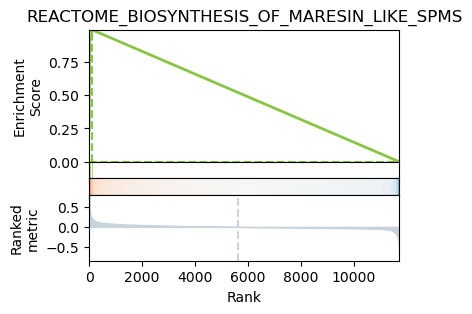

In [216]:
_, le = dc.pl.leading_edge(
    df = df,
    net = msigdb_mouse,
    stat = "arch_1",
    name = "REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS"
)
le

array(['Cyp2e1', 'Cyp2c29', 'Cyp2c50', 'Cyp1a2', 'Cyp2c37', 'Cyp2a5',
       'Cyp2c38', 'Ahr'], dtype='<U14')

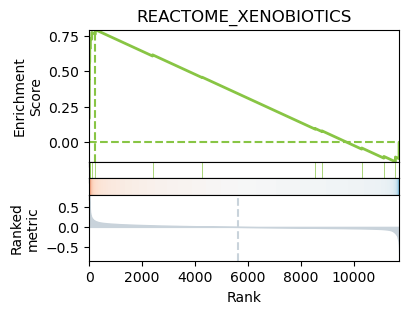

In [215]:
_, le = dc.pl.leading_edge(
    df = df,
    net = msigdb_mouse,
    stat = "arch_1",
    name = "REACTOME_XENOBIOTICS"
)
le

In [202]:
"STIMULATED_TRANSCRIPTION"

'STIMULATED_TRANSCRIPTION'

In [ ]:
archetype_expression.T.sort_values(3, ascending=False).head(20)

,0,1,2,3
Apoa1,-0.446007,-0.646273,0.993034,0.931033
Ambp,-0.218938,-0.440602,0.277368,0.876649
Apoa2,-0.712313,-0.492375,1.007364,0.855560
Ttr,-0.567515,-0.636843,1.215179,0.848930
Vtn,-0.219574,-0.450192,0.276901,0.847168
mt-Co3,0.005657,-0.223056,-0.352636,0.813757
Kng1,-0.203398,-0.343663,0.209040,0.766787
Apoe,-0.531175,-0.451685,0.665421,0.765337
Fgb,-0.104190,-0.646850,0.442956,0.744060
Apoh,-0.288664,-0.346695,0.331514,0.740519


In [167]:
msigdb.loc[msigdb["geneset"].isin(["REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS"])]

,genesymbol,collection,geneset
,,,
1130631,COMPLEX:CYP2C8,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
1130784,COMPLEX:CYP2C9,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
1130958,COMPLEX:CYP2D6,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
1131125,COMPLEX:CYP2E1,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
1131745,COMPLEX:CYP3A4,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
2486329,CYP1A2,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
2489995,CYP2C8,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
2490148,CYP2C9,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
2490322,CYP2D6,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS


In [152]:
msigdb_mouse.loc[msigdb_mouse["source"].isin(["REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS"])]

,target,collection,source
4056,Cyp1a2,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4161,Cyp2c66,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4162,Cyp2c65,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4163,Cyp2c29,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4164,Cyp2c39,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4165,Cyp2c38,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4203,Cyp2c37,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4205,Cyp2c50,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4225,Cyp2e1,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS


In [ ]:
archetype_expression.iloc

,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Adhfe1,Vcpip1,1700034P13Rik,Sgk3,Snhg6,Tcf24,Ppp1r42,Cops5,Cspp1,Arfgef1,Prex2,Ncoa2,Tram1,Lactb2,Xkr9,Terf1,Rpl7,Rdh10,Stau2,Ube2w,Eloc,Tmem70,Ly96,Pkhd1,Mcm3,Tram2,Tmem14a,Gsta3,Gm29107,Ogfrl1,Smap1,Sdhaf4,...,Clic5,Gm26785,Rfx2,A930029G22Rik,C030034I22Rik,Emilin2,Clip4,C430042M11Rik,Dync2li1,Gm1976,Zfp438,Gm15972,B930094E09Rik,Tmco6,Pcdh12,Spink1,Gm4950,Arhgef37,Gm17669,Gm26910,Ccdc68,Gm6133,Pard6g,Doc2g,Cabp4,Gm960,Gm14966,Slc22a26,Fads3,Gm28347,Cep78,Anxa1,C730002L08Rik,Gm6563,Insl6,Aldh18a1,Tctn3,Kazald1,Hps6,Tmlhe
0,-0.066439,0.018579,-0.008412,-0.019018,0.046817,-0.021255,0.092845,0.001078,0.010772,-0.002761,-0.032249,-0.002926,0.042362,0.003738,0.016525,-0.025878,0.014681,0.050465,0.000606,-0.002221,0.022170,-0.002941,-0.037402,-0.025602,-0.023520,-0.042402,-0.014873,-0.025711,-0.024677,0.040734,-0.056434,-0.024845,-0.009563,0.039916,-0.016577,-0.330351,-0.032142,0.013739,0.021468,-0.054328,...,-0.022336,-0.021990,-0.021996,-0.026585,-0.016238,-0.020170,-0.014831,-0.021006,-0.021581,-0.013954,-0.015922,-0.029054,-0.025328,-0.024069,-0.026926,-0.024230,-0.021174,-0.018599,-0.021764,-0.020139,-0.020348,-0.015598,-0.005957,-0.015157,-0.021995,0.001939,-0.020679,-0.026875,-0.018552,-0.025319,-0.031320,-0.020170,-0.036775,-0.009384,-0.029803,-0.012432,-0.013522,-0.016803,-0.020348,-0.007080
1,-0.006510,0.057015,0.083924,0.034841,-0.020311,-0.024841,0.075537,-0.010912,0.128012,-0.025479,0.012783,0.049176,-0.045026,-0.032644,-0.076218,-0.021959,-0.000612,-0.036663,-0.030930,0.074635,-0.022156,0.082682,-0.018415,-0.016560,-0.011866,0.091305,0.022584,-0.012601,-0.008653,0.001856,-0.023969,-0.056435,0.011468,-0.045174,0.099811,0.209899,-0.027204,0.032724,0.007319,-0.017141,...,-0.022349,-0.020990,-0.022210,-0.013269,-0.010043,-0.020567,-0.013823,0.003252,-0.028444,-0.014343,-0.028299,-0.026239,-0.025163,0.008516,-0.015733,-0.030452,-0.020472,-0.031049,-0.012500,-0.000422,-0.021786,-0.018292,-0.020467,-0.012974,-0.022328,-0.028698,-0.006830,-0.018215,-0.027439,-0.028249,0.016821,-0.020567,0.057766,-0.021383,-0.000273,-0.021290,-0.012057,-0.009047,-0.017033,-0.019981
2,0.190365,-0.085882,-0.060337,-0.031223,-0.010497,-0.026615,-0.111214,-0.017128,-0.123641,-0.049818,-0.046699,0.009747,0.093080,0.057869,0.103692,0.095069,-0.026110,-0.073365,-0.054695,-0.083235,-0.006082,-0.060086,-0.001512,0.007696,0.214482,-0.038769,-0.053947,0.011492,0.173380,-0.023489,0.004133,0.002624,-0.009132,-0.032459,-0.060633,0.208825,-0.013033,-0.054908,-0.010030,0.231594,...,0.041461,-0.018304,0.002403,-0.030529,-0.022334,-0.020935,-0.022012,-0.022354,-0.028456,-0.022178,-0.035949,-0.012921,-0.001085,-0.031226,-0.022875,-0.025306,0.025613,-0.037329,-0.020355,-0.022353,-0.005412,-0.031260,-0.022306,-0.022260,0.013432,-0.031161,-0.022059,0.033536,-0.001551,-0.011410,-0.048124,-0.020935,-0.053849,-0.022345,0.004740,-0.022007,-0.022219,-0.022277,-0.021846,-0.022299
3,0.013341,-0.095568,-0.140897,-0.075132,-0.005497,-0.026581,-0.170792,-0.039166,-0.165271,0.021028,-0.041789,-0.044403,-0.095685,-0.033086,-0.025276,0.015889,-0.038221,0.018114,-0.046550,-0.039672,-0.058714,-0.108970,0.072115,0.056495,-0.174635,-0.073108,0.015695,-0.017988,-0.097792,-0.048005,-0.022652,0.029133,-0.023687,-0.047722,-0.039252,-0.022564,-0.050117,-0.043078,-0.058421,-0.057644,...,-0.021032,-0.027487,-0.011844,-0.020695,-0.021874,-0.021980,-0.021596,-0.022207,-0.011412,-0.022013,-0.022798,-0.004890,-0.017123,-0.030919,-0.027246,-0.003360,-0.039763,-0.021006,-0.021037,-0.022231,-0.016603,-0.029263,-0.021890,-0.021949,-0.019712,-0.029704,-0.020473,-0.029893,-0.019784,-0.020525,-0.041870,-0.021980,-0.052732,-0.021664,-0.028271,-0.021062,-0.021590,-0.022215,-0.022248,-0.022023


In [99]:
msigdb = msigdb_raw[msigdb_raw["collection"]=="go_biological_process"]
selection_vec = ~ np.array(["RESPONSE_TO" in s for s in msigdb["geneset"]])
msigdb = msigdb.loc[selection_vec, :].copy()
msigdb

,genesymbol,collection,geneset
,,,
73,A1CF,go_biological_process,GOBP_MRNA_METABOLIC_PROCESS
78,A1CF,go_biological_process,GOBP_EMBRYO_IMPLANTATION
84,A1CF,go_biological_process,GOBP_MACROMOLECULE_CATABOLIC_PROCESS
87,A1CF,go_biological_process,GOBP_MRNA_MODIFICATION
88,A1CF,go_biological_process,GOBP_RNA_PROCESSING
...,...,...,...
5522215,ZZZ3,go_biological_process,GOBP_PROTEIN_ACYLATION
5522223,ZZZ3,go_biological_process,GOBP_HISTONE_H3_ACETYLATION
5522241,ZZZ3,go_biological_process,GOBP_REGULATION_OF_MULTICELLULAR_ORGANISMAL_DE...


In [ ]:
selection_vec = ~ np.array(["RESPONSE_TO" in s for s in msigdb["geneset"]])



np.float64(0.9096932042838014)